In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [10]:
from tensorflow import keras

# Data

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 8s 0us/step


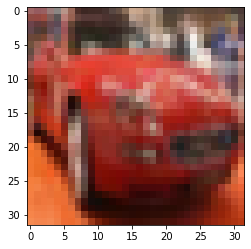

In [6]:
 plt.imshow(X_train[5])

In [7]:
X_train = X_train / 255
X_test = X_test / 255

# Model

In [22]:
model= keras.models.Sequential([
    keras.layers.Conv2D(64, (4,4), input_shape = (32,32,3), activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (4,4), activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [28]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 64)        3136      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        65600     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [32]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, callbacks = [early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 150us/sample - loss: 1.5024 - accuracy: 0.4571 - val_loss: 1.2700 - val_accuracy: 0.5521
Epoch 2/10
50000/50000 [==============================] - 6s 122us/sample - loss: 1.1666 - accuracy: 0.5893 - val_loss: 1.1185 - val_accuracy: 0.6078
Epoch 3/10
50000/50000 [==============================] - 6s 121us/sample - loss: 1.0149 - accuracy: 0.6451 - val_loss: 1.0329 - val_accuracy: 0.6427
Epoch 4/10
50000/50000 [==============================] - 6s 125us/sample - loss: 0.9098 - accuracy: 0.6820 - val_loss: 0.9798 - val_accuracy: 0.6585
Epoch 5/10
50000/50000 [==============================] - 6s 128us/sample - loss: 0.8362 - accuracy: 0.7083 - val_loss: 0.9758 - val_accuracy: 0.6639
Epoch 6/10
50000/50000 [==============================] - 6s 127us/sample - loss: 0.7713 - accuracy: 0.7284 - val_loss: 0.9517 - val_accuracy: 0.6797
Epoch 7/10
50000/50000 [==========================

In [33]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

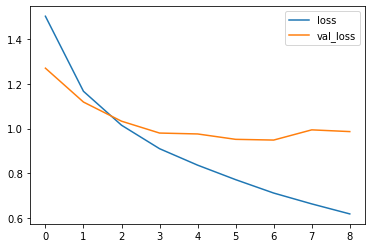

In [35]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

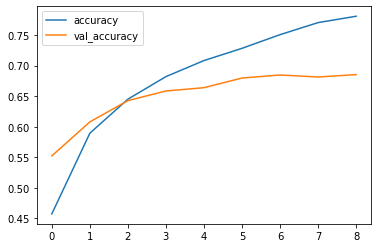

In [36]:
metrics[['accuracy', 'val_accuracy']].plot()